Yes, it is entirely possible to implement 3D Gabor filters and convolve them with 3D images in Python. Extending Gabor filters to three dimensions allows you to capture volumetric features that may span across multiple slices, which is especially beneficial for analyzing 3D datasets like MRI or CT scans. Processing the data slice by slice in 2D is an alternative, but it may not capture the full spatial relationships present in 3D data.

Here's how you can proceed:

### **1. Understanding 3D Gabor Filters**

A 3D Gabor filter is an extension of the 2D Gabor filter, characterized by a sinusoidal plane wave modulated by a 3D Gaussian envelope. It can be defined with parameters controlling its scale, frequency, and orientation in 3D space (two orientation angles: azimuth and elevation).

### **2. Implementing 3D Gabor Filters in Python**

**a. Generate the 3D Gabor Kernel**

You can create a function to generate a 3D Gabor filter kernel based on the desired parameters:

```python


In [1]:
import numpy as np

def gabor_kernel_3d(sigma_x, sigma_y, sigma_z, theta, phi, frequency):
    # Define the grid
    size_x = int(6 * sigma_x)
    size_y = int(6 * sigma_y)
    size_z = int(6 * sigma_z)
    x, y, z = np.meshgrid(
        np.arange(-size_x//2, size_x//2),
        np.arange(-size_y//2, size_y//2),
        np.arange(-size_z//2, size_z//2),
        indexing='ij'
    )
    
    # Rotate the grid
    x_theta = x * np.cos(theta) * np.cos(phi) + y * np.sin(theta) * np.cos(phi) + z * np.sin(phi)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    z_theta = -x * np.cos(theta) * np.sin(phi) - y * np.sin(theta) * np.sin(phi) + z * np.cos(phi)
    
    # Create the Gabor kernel
    gb = np.exp(-0.5 * ((x_theta**2) / sigma_x**2 + (y_theta**2) / sigma_y**2 + (z_theta**2) / sigma_z**2))
    gb *= np.cos(2 * np.pi * frequency * x_theta)
    
    return gb


```

**b. Generate a Filter Bank**

Create a bank of Gabor filters with different scales and orientations:

```python


In [2]:
def generate_gabor_filter_bank(scales, orientations_theta, orientations_phi, frequencies):
    filter_bank = []
    parameters =[]   
    for sigma in scales:
        for theta in orientations_theta:
            for phi in orientations_phi:
                for freq in frequencies:
                    kernel = gabor_kernel_3d(sigma, sigma, sigma, theta, phi, freq)
                    parameters.append((sigma, theta, phi, freq))
                    filter_bank.append(kernel)

    return filter_bank, parameters



```

### **3. Convolution with the 3D Image**

Use `scipy.ndimage` or `scipy.signal` for convolution:

```python


In [3]:
from scipy.ndimage import convolve

def convolve_image_with_filters(image, filter_bank):
    responses = []
    for kernel in filter_bank:
        response = convolve(image, kernel, mode='reflect')
        responses.append(response)
    return responses


```

### **4. Optimization Tips**

- **FFT-Based Convolution:** For large kernels or images, use FFT-based convolution (`scipy.signal.fftconvolve`) for efficiency.
  
  ```python
  


In [4]:
from scipy.signal import fftconvolve

def convolve_image_with_filters_fft(image, filter_bank):
      responses = []
      for kernel in filter_bank:
          response = fftconvolve(image, kernel, mode='same')
          responses.append(response)
      return responses



- **GPU Acceleration:** If dealing with very large datasets, consider using libraries like CuPy (GPU-accelerated NumPy-like library) or deep learning frameworks like TensorFlow or PyTorch, which support GPU acceleration and have efficient implementations of 3D convolutions.

### **5. Processing Slice by Slice**

If computational resources are limited, processing the image slice by slice using 2D Gabor filters is a feasible alternative. However, be aware that this approach might not capture 3D features that span multiple slices.

```python


In [5]:
from skimage.filters import gabor_kernel
from scipy.ndimage import convolve

def process_slice_by_slice(image_3d, frequencies, orientations):
    responses = []
    for z in range(image_3d.shape[2]):
        slice_2d = image_3d[:, :, z]
        slice_responses = []
        for theta in orientations:
            kernel = np.real(gabor_kernel(frequency, theta=theta))
            response = convolve(slice_2d, kernel, mode='reflect')
            slice_responses.append(response)
        responses.append(slice_responses)
    return responses



```

### **6. Additional Resources**

- **Scikit-Image:** While `scikit-image` does not provide a 3D Gabor filter out of the box, it can be extended or used for 2D operations.
  
- **Custom Implementations:** There are community-contributed implementations available online (e.g., GitHub repositories) that might offer optimized 3D Gabor filters.

- **Literature:** Refer to academic papers and articles that discuss 3D Gabor filters for detailed mathematical formulations and implementation strategies.

### **7. Example Usage**

Here's how you might use the functions above:

```python


In [10]:
import os

file_geo = "C:\\Users\\novalis\\OneDrive\\datasa\\geoframe\\geoframe_raw.npy"
if os.path.exists(file_geo):
	geo = np.load(file_geo)
else:
	print(f"File not found: {file_geo}")

file_geo_detect="C:\\Users\\novalis\\OneDrive\\datasa\\geoframe\\geoframe_demo_detectII.dat"
if os.path.exists(file_geo_detect):
    geo_detect = np.fromfile(file_geo_detect, dtype=np.float32)
    geo_detect = geo_detect.reshape(geo.shape[0], geo.shape[1], geo.shape[2])


In [12]:
import matplotlib.pyplot as plt
print(geo.shape)

(271, 221, 876)


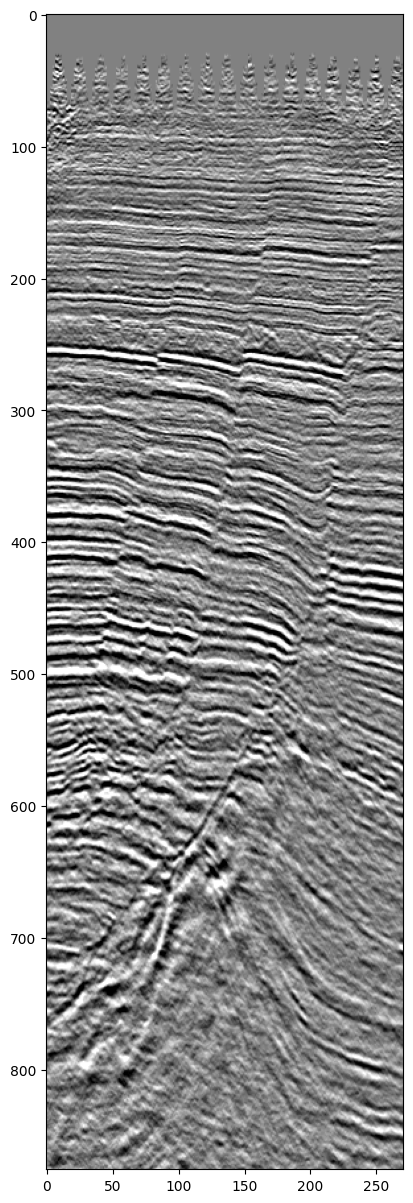

In [17]:
fig=plt.figure(figsize=(10, 15))
plt.imshow(geo[:,100,:].T, cmap='gray')
plt.show()
np.save("img_geo", geo[:,100,:].T)

In [61]:
# Define parameters
scales = [1]
orientations_theta = [0, np.pi/4, np.pi/2]
orientations_phi = [0, np.pi/4]
frequencies = [0.1,0.2]

# Generate filter bank
filter_bank ,parameters= generate_gabor_filter_bank(scales, orientations_theta, orientations_phi, frequencies)

print('Filter bank size:', len(filter_bank))

Filter bank size: 12


In [62]:

# # Load your 3D image (e.g., using nibabel for medical images)
# import nibabel as nib
# image = nib.load('your_image.nii.gz').get_fdata()

# Convolve image with filters
responses = convolve_image_with_filters_fft(geo, filter_bank)


In [63]:
print(len(responses))
print(responses[0].shape)
print(responses[1].shape)


12
(271, 221, 876)
(271, 221, 876)


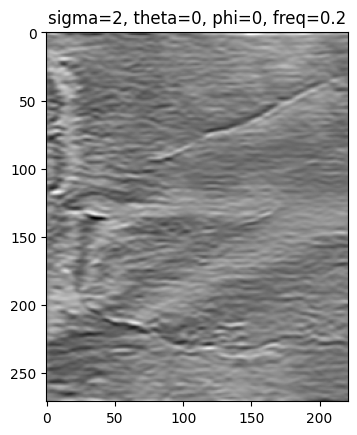

0


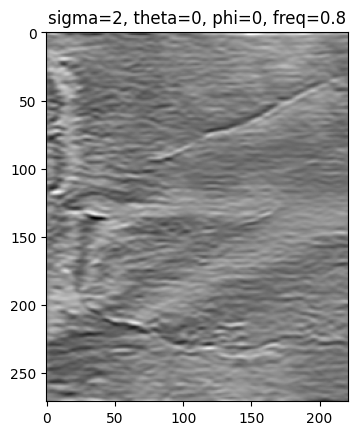

1


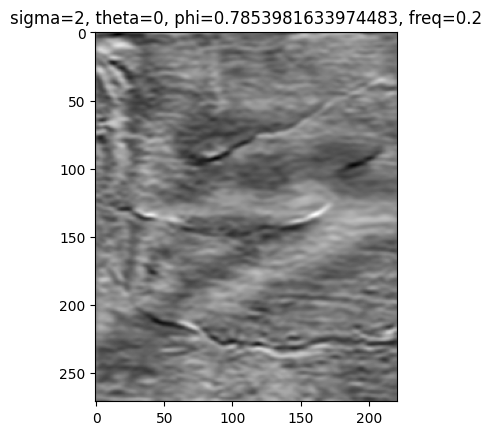

2


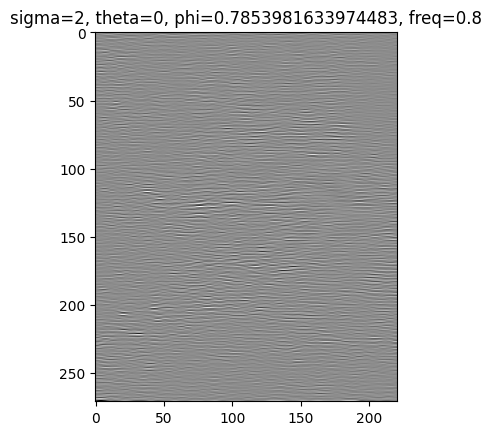

3


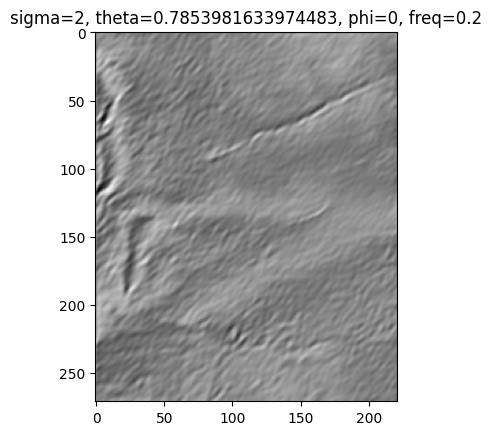

4


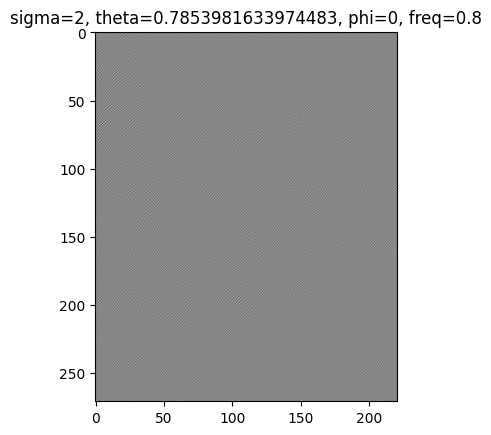

5


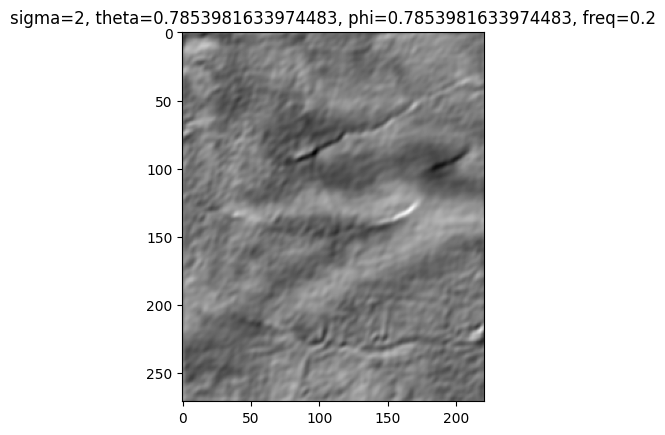

6


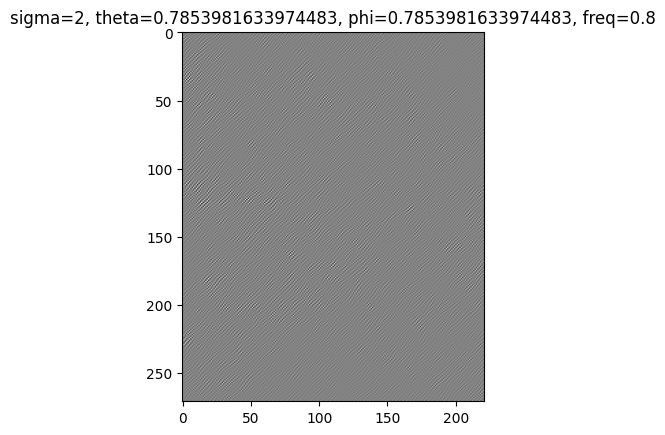

7


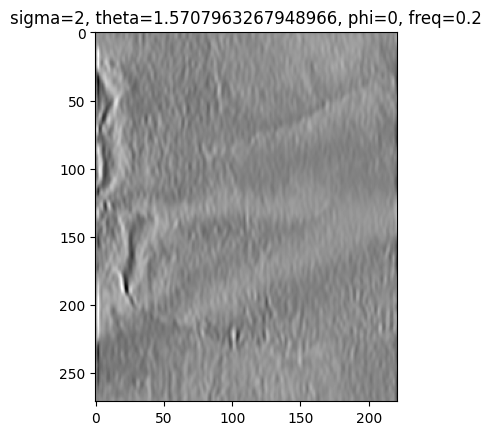

8


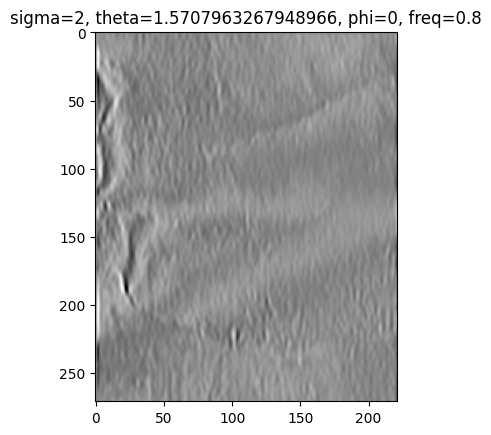

9


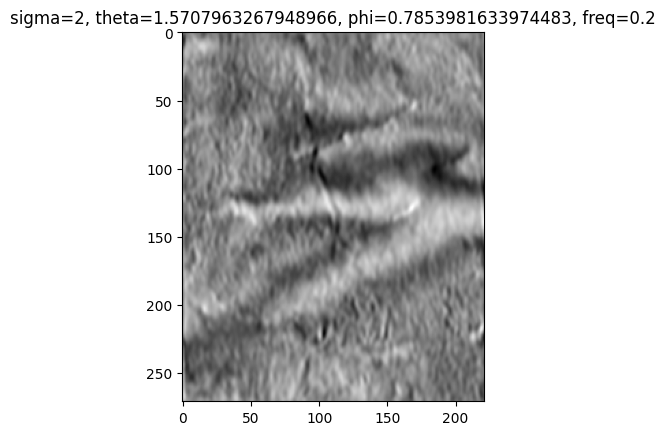

10


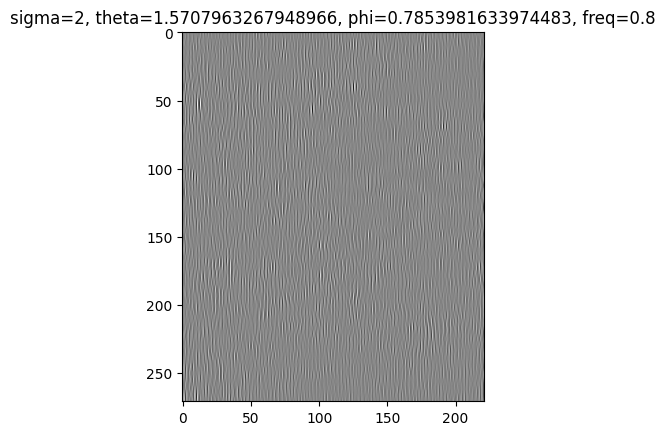

11


In [60]:
si=265
for i in range(len(responses)):
    im=responses[i][:,:,si]
    fig = plt.figure()
    plt.imshow(im,cmap='gray')
    plt.title(f"sigma={parameters[i][0]}, theta={parameters[i][1]}, phi={parameters[i][2]}, freq={parameters[i][3]}")
    plt.show()
    print(i)

(6, 6, 12)
(271, 221, 876)


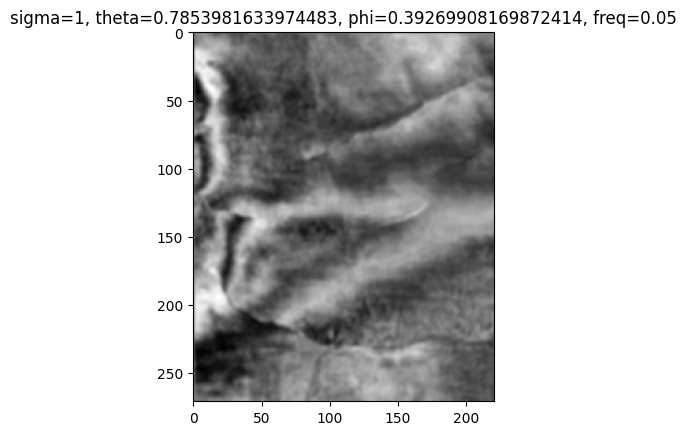

In [84]:
sigma_x=1 
sigma_y=1 
sigma_z=2 
theta=(np.pi/8)*2 
phi=(np.pi/8) *1
frequency=0.1/2
kernel=gabor_kernel_3d(sigma_x, sigma_y, sigma_z, theta, phi, frequency)
print(kernel.shape)
response = fftconvolve(geo, kernel, mode='same')
print(response.shape)
im=response[:,:,si]
fig = plt.figure()
plt.imshow(im,cmap='gray')
plt.title(f"sigma={sigma_x}, theta={theta}, phi={phi}, freq={frequency}")
plt.show()


### **Conclusion**

Implementing 3D Gabor filters in Python is feasible and can provide valuable features for analyzing 3D images. While computationally more intensive than 2D processing, the richer feature set may justify the additional computational cost.

**Note:** Be mindful of the memory and computational requirements, especially with large images and filter banks. Always test with smaller datasets to ensure correctness before scaling up.